In [2]:
import pandas as pd
import glob
import os
import statistics
from pathlib import Path
from bokeh.models import HoverTool
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [44]:
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

None


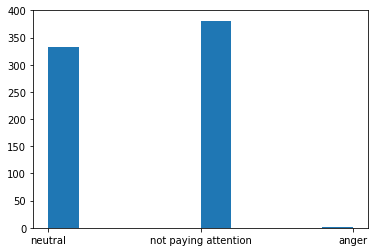

In [3]:
# Interactions Histogram
def freqdect():
    path = os.getcwd() +'\*.csv'
    data = pd.DataFrame()
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        data = data.append(df,ignore_index=True)
    plt.hist(data['Emotion'])
    
print(freqdect())

In [16]:
# Data frame with the students' interactions metrics
def attention_analytics():
    path = os.getcwd() +'\*.csv'
    data = pd.DataFrame()
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        student_id = Path(fname).stem
        df['Emotion_Value'].where(~(df['Emotion'] == 'not paying attention'), other=-1, inplace=True)
        std = df['Emotion_Value'].std() #Desviacion estandar
        median = df['Emotion_Value'].median() #Media
        mean = df['Emotion_Value'].mean()
        npa_count = df['Emotion'].loc[df['Emotion'] == 'not paying attention'].count()
        npa_pct = npa_count / df['Emotion'].count()
        score = 1 - npa_pct
        result = ''
        if score >= 0.8:
            result = 'Good Attention'
        elif (0.8 > score) and (score >= 0.5):
            result = 'Regular Attention'
        else:
            result = 'Lack of Attention'
        estudiante={'student_id':student_id,'attention_mean':mean, 'attention_std':std, 'npa_count': npa_count, 'npa_pct': npa_pct, 'attention_score': score, 'result': result}
        data = data.append(estudiante,ignore_index=True)
    return data[['student_id','attention_mean','attention_std','npa_count', 'npa_pct', 'attention_score', 'result']]
        
    
attention_analytics()

,student_id,attention_mean,attention_std,npa_count,npa_pct,attention_score,result
0,8-141-1385,-0.103194,0.993439,116.0,0.549763,0.450237,Lack of Attention
1,8-357-1002,-0.517179,0.851017,232.0,0.755700,0.244300,Lack of Attention
2,8-914-1545,0.658480,0.748201,33.0,0.168367,0.831633,Good Attention


In [59]:
# Time series with the group's interactions
def attention_time_series():
    path = os.getcwd() +'\*.csv'
    data = pd.DataFrame()
    for fname in glob.glob(path):
        df = pd.read_csv(fname)
        student_id = Path(fname).stem
        df['Emotion_Value'].where(~(df['Emotion'] == 'not paying attention'), other=-1, inplace=True)
        record = pd.DataFrame({student_id+'_ts': df['Timestamp'], student_id+'_attention': df['Emotion_Value']})
        data = pd.concat([data, record], axis=1)
    data = data.dropna()
    cols = data.columns.tolist()
    data['Timestamp'] = data[data.select_dtypes('object').columns.tolist()[0]]
    data['Mean_Values'] = data.select_dtypes(np.float64).mean(axis=1)
    data = data.drop(columns=cols)
    TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
    p = figure(title='Attention vs Time', plot_width=700, plot_height=700, tools=TOOLS)
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Group_Mean_Emotion_Value'
    p.circle(data.loc[data['Mean_Values'] <= 0].index, data['Mean_Values'].loc[data['Mean_Values'] <= 0], size = 10, color = 'red')
    p.line('index', 'Mean_Values', line_color='blue', line_width = 3, source=data)
    show(p)   

attention_time_series()
